# Config ENV

In [ ]:
from google.colab import files 
files.upload() 

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Import libraries And see the dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matplot
import numpy as np

import re
import sklearn

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
train = pd.read_csv('/content/Train_data.csv')
test = pd.read_csv('/content/test_data.csv')
test = test.drop('Unnamed: 0', axis=1)

In [ ]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
test.drop(['xAttack'],axis=1,inplace= True)
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,icmp,25,4,0,0,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.65,0.65,0.32,0.32
1,0,icmp,25,2,312,1856,0,0,0,0,...,1,254,1.00,0.00,1.00,0.06,0.00,0.00,0.00,0.00
2,0,icmp,25,2,245,2058,0,0,0,0,...,114,255,1.00,0.00,0.01,0.05,0.01,0.00,0.00,0.00
3,0,icmp,25,2,298,1267,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0,icmp,20,2,740,0,0,0,0,0,...,104,19,0.18,0.03,0.18,0.00,0.00,0.00,0.00,0.00


In [ ]:
train.describe()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,125973.000000,125973.000000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,32.086288,2.575179,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,16.462574,1.141552,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,20.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,25.000000,2.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,50.000000,4.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,70.000000,11.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train['service'].unique()

array([20, 45, 50, 25, 52, 37, 39, 15, 36, 61, 19, 12, 59, 67,  3, 55,  8,
       38, 66,  5,  6, 33, 16, 22, 69, 60, 17, 70, 29, 30, 14, 31, 34, 58,
       35, 32, 56, 64, 24, 18, 44, 11, 43,  7,  9, 57, 10, 54, 41, 48, 42,
        1, 47, 49, 63, 46, 51, 40, 53,  2, 65,  4, 62, 23])

In [ ]:
train['service'].value_counts()

25    40871
50    21853
12     9612
20     8614
55     7313
      ...  
63        8
46        5
62        3
4         2
23        2
Name: service, Length: 64, dtype: int64

In [ ]:
train['xAttack'].unique()

array(['normal', 'dos', 'r2l', 'probe', 'u2r'], dtype=object)

In [ ]:
train['xAttack'].value_counts()

normal    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: xAttack, dtype: int64

<Figure size 720x576 with 0 Axes>

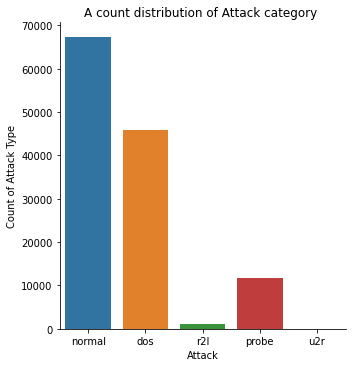

In [ ]:
Attack_counts= pd.value_counts(train.xAttack)
plt.figure(figsize=(10,8))
ax=sns.catplot(x='xAttack',kind='count',data=train)
plt.xlabel('Attack')
plt.ylabel('Count of Attack Type')
plt.title('A count distribution of Attack category ')
plt.show()

<Figure size 2160x1440 with 0 Axes>

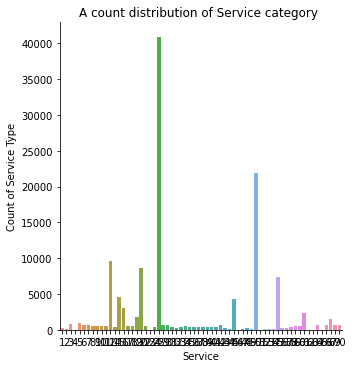

In [ ]:
Services_counts= pd.value_counts(train.service)
plt.figure(figsize=(30,20))
ax=sns.catplot(x='service',kind='count',data=train)
plt.xlabel('Service')
plt.ylabel('Count of Service Type')
plt.title('A count distribution of Service category ')
plt.show()

<Figure size 720x576 with 0 Axes>

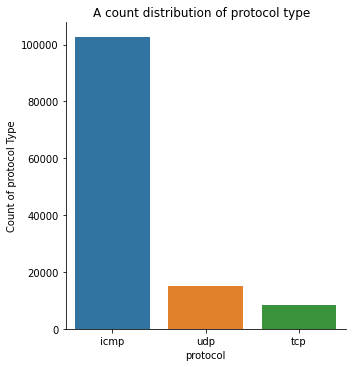

In [ ]:
protocols_counts= pd.value_counts(train.protocol_type)
plt.figure(figsize=(10,8))
ax=sns.catplot(x='protocol_type',kind='count',data=train)
plt.xlabel('protocol')
plt.ylabel('Count of protocol Type')
plt.title('A count distribution of protocol type  ')
plt.show()

In [ ]:
train['num_outbound_cmds'].value_counts()
test['num_outbound_cmds'].value_counts()

0    10000
Name: num_outbound_cmds, dtype: int64

In [ ]:
# remove num outboundcmd ca sert a rien 
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

# data encoding : 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrain = train.select_dtypes(include=['object']).copy()
cattest = test.select_dtypes(include=['object']).copy()

# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

# separate target column from encoded data 
enctrain = traincat.drop(['xAttack'], axis=1)
cat_Ytrain = traincat[['xAttack']].copy()

train_x = pd.concat([sc_traindf,enctrain],axis=1)
train_y = train['xAttack']
train_x.shape



(125973, 40)

In [ ]:
test_df = pd.concat([sc_testdf,testcat],axis=1)
test_df.shape

(10000, 40)

# Feature Selection :

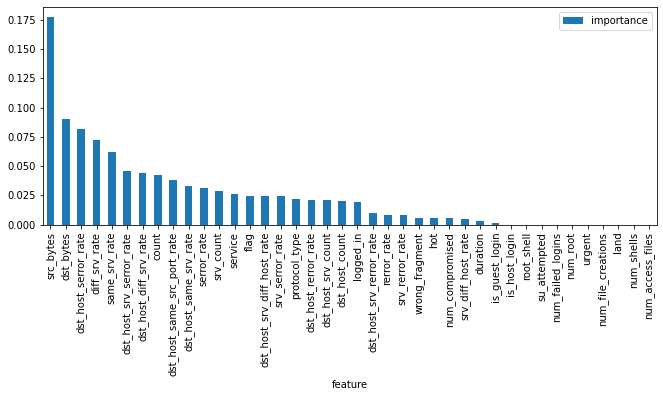

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(train_x, train_y);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [ ]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=15)
rfe = rfe.fit(train_x, train_y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_x.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['service',
 'src_bytes',
 'dst_bytes',
 'count',
 'srv_count',
 'srv_serror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_rerror_rate']

# Training : 

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(train_x,train_y,train_size=0.70, random_state=2)

In [ ]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train); 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

            
# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## EVALUATE MODELS

In [ ]:
from sklearn import metrics

models = []

models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9978340016764665

Model Accuracy:
 0.9999546387543802

Confusion matrix:
 [[32160     0     0     0     0]
 [    4 47207     0     0     0]
 [    0     0  8073     0     0]
 [    0     0     0   706     0]
 [    0     0     0     0    31]]

Classification report:
               precision    recall  f1-score   support

         dos       1.00      1.00      1.00     32160
      normal       1.00      1.00      1.00     47211
       probe       1.00      1.00      1.00      8073
         r2l       1.00      1.00      1.00       706
         u2r       1.00      1.00      1.00        31

    accuracy                           1.00     88181
   macro avg       1.00      1.00      1.00     88181
weighted avg       1.00      1.00      1.00     88181



============================== KNeighborsClassifier Model Evaluation ==============================

Cross

## VALIDATING MODELS

In [ ]:
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()   


============================== Decision Tree Classifier Model Test Results ==============================

Model Accuracy:
 0.998174216765453

Confusion matrix:
 [[13761     4     2     0     0]
 [    3 20104    21     1     3]
 [    3    12  3567     0     1]
 [    0     9     0   280     0]
 [    0    10     0     0    11]]

Classification report:
               precision    recall  f1-score   support

         dos       1.00      1.00      1.00     13767
      normal       1.00      1.00      1.00     20132
       probe       0.99      1.00      0.99      3583
         r2l       1.00      0.97      0.98       289
         u2r       0.73      0.52      0.61        21

    accuracy                           1.00     37792
   macro avg       0.94      0.90      0.92     37792
weighted avg       1.00      1.00      1.00     37792



============================== KNeighborsClassifier Model Test Results ==============================

Model Accuracy:
 0.9953693903471634

Confusion matri

In [ ]:
# PREDICTING FOR TEST DATA 
pred_knn = KNN_Classifier.predict(test_df)
pred_log = LGR_Classifier.predict(test_df)
pred_dt = DTC_Classifier.predict(test_df)

In [ ]:
submission = pd.DataFrame({'Id': test_df.index, 'Type': pred_dt})
submission.to_csv('Attack_evaluation.csv', index=False)
submission.head(10).set_index('Id')

,Type
Id,
0,normal
1,normal
2,normal
3,normal
4,normal
5,normal
6,normal
7,r2l
8,normal


In [ ]:
test_df.head()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type
0,-0.15691,-0.660498,1.666318,-0.078905,-0.099508,-0.022366,-0.061352,-0.018977,-0.143894,-0.142444,...,1.034169,0.903668,-0.409810,-0.433573,-0.224984,2.041217,1.974774,0.215112,0.222724,0
1,-0.15691,-0.660498,-0.188134,-0.075309,-0.007026,-0.022366,-0.061352,-0.018977,-0.143894,-0.142444,...,1.025204,0.903668,-0.409810,2.822286,0.446543,-0.354612,-0.349672,-0.607261,-0.570780,0
2,-0.15691,-0.660498,-0.188134,-0.076081,0.003040,-0.022366,-0.061352,-0.018977,-0.143894,-0.142444,...,1.034169,0.903668,-0.409810,-0.401014,0.334622,-0.317753,-0.349672,-0.607261,-0.570780,0
3,-0.15691,-0.660498,-0.188134,-0.075470,-0.036375,-0.022366,-0.061352,-0.018977,-0.143894,-0.142444,...,1.034169,0.903668,-0.409810,-0.433573,-0.224984,-0.354612,-0.349672,-0.607261,-0.570780,0
4,-0.15691,-0.976474,-0.188134,-0.070375,-0.099508,-0.022366,-0.061352,-0.018977,-0.143894,-0.142444,...,-1.081607,-0.975960,-0.272309,0.152482,-0.224984,-0.354612,-0.349672,-0.607261,-0.570780,0


In [55]:
from pathlib import Path  

filepath = Path('/content/test_validation.csv')  

filepath.parent.mkdir(parents=True, exist_ok=True)  

test_df.to_csv(filepath) 

# Save Model :

In [57]:
import pickle

pickle.dump(DTC_Classifier, open('model.pkl', 'wb'))


# Load Model : 

In [ ]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)
